<a href="https://colab.research.google.com/github/Prakface/Practice/blob/master/ApplyingExisting1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
url='https://raw.githubusercontent.com/Prakface/Practice/master/initialFeatures.csv'

data=pd.read_csv(url)


print(data.isnull())

#the follwoing line is used to remove null valued rows, but the index of rows still corresponds to old one , loses serial order
data_modified= data.dropna()   


#print(data_modified)


#to arrange rows in serial order which are left in file, storeback modified data frame to a csv file and again read this new csv file into a data frame



data_modified.to_csv("modifiedData.csv", index=False)



df2=pd.read_csv("modifiedData.csv")

#df2


dataset = df2.drop("level", axis = 1)
data_X = dataset.iloc[:, 0:27].values
data_y = dataset.iloc[:, 27].values
from sklearn.utils import shuffle
dataset = shuffle(dataset, random_state=0)









       image    url  question  original  ...  retweets_count   hour  level  result
0      False  False     False     False  ...           False  False  False   False
1       True   True      True      True  ...            True   True   True    True
2      False  False     False     False  ...           False  False  False   False
3       True   True      True      True  ...            True   True   True    True
4      False  False     False     False  ...           False  False  False   False
5       True   True      True      True  ...            True   True   True    True
6      False  False     False     False  ...           False  False  False   False
7       True   True      True      True  ...            True   True   True    True
8      False  False     False     False  ...           False  False  False   False
9       True   True      True      True  ...            True   True   True    True
10     False  False     False     False  ...           False  False  False   False
11  

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.35, random_state = 0)

# Feature Scaling
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)'''



'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

In [7]:
#For kernel SVM

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix


print("\n for svm with rbf kernel \n ")
clf = SVC(kernel = 'rbf', gamma=0.3)
#clf.fit(X_train, y_train)

#clf2 = SVC(kernel='linear', C=1, random_state=0)

# cross_validate without scoring parameter computes accuracy for each fold
scores = cross_val_score(clf, data_X, data_y,cv=10)

#sorted(scores.keys())
print("\n accuracy scores = ", scores)

print("\n the mean accuracy of 10 fold cross validation = ", scores.mean())
#for finding F1 measure at each fold, use scoring marameter in cross_validate
scores = cross_val_score(clf, data_X, data_y, scoring='f1_macro',cv=10)

print("\n F1 measure values  = ", scores)

print("\n Average F1 score = ", scores.mean())

sa=scores.mean()


clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = clf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

print("\n after PCA")
 

sc = StandardScaler() 

 
''' 
X_train2 = sc.fit_transform(X_train) 
X_test2 = sc.transform(X_test)

pca = PCA(n_components =2) 
  
X_train2 = pca.fit_transform(X_train2) 
X_test2 = pca.transform(X_test2) 
  
explained_variance = pca.explained_variance_ratio_

'''
X_p=sc.fit_transform(data_X)
  
clf = SVC(kernel = 'rbf', gamma=0.3)
scores = cross_val_score(clf, X_p, data_y,cv=10)

print(scores)
print(scores.mean())

#clf.fit(X_train, y_train)



  


 for svm with rbf kernel 
 

 accuracy scores =  [0.56462585 0.59353741 0.5952381  0.71088435 0.79931973 0.78534923
 0.63032368 0.59795571 0.62691652 0.560477  ]

 the mean accuracy of 10 fold cross validation =  0.6464627588684537

 F1 measure values  =  [0.53432082 0.56721966 0.56786067 0.70456453 0.79785808 0.78520898
 0.63004882 0.57949247 0.60509024 0.52472321]

 Average F1 score =  0.6296387482252412
[[537 456]
 [167 897]]

 after PCA
[0.62755102 0.60714286 0.62414966 0.72789116 0.79931973 0.78364566
 0.73764906 0.6286201  0.70868825 0.59284497]
0.6837502462654568


In [0]:
len(X_train2)

len(data_y)

5875

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, data_X, data_y, scoring=scoring,cv=5)
sorted(scores.keys())

In [0]:
from sklearn.model_selection import cross_val_score
print('\n for svm with linear  kernel \n')
clf = SVC(kernel='linear',degree=2, C=1, random_state=0)

# cross_validate without scoring parameter computes accuracy for each fold
scores = cross_val_score(clf, data_X, data_y,cv=5)
sorted(scores.keys())
print("\n accuracy scores = ", scores)

#for finding F1 measure at each fold, use scoring marameter in cross_validate
scores = cross_val_score(clf, data_X, data_y, scoring='f1_macro',cv=5)
sorted(scores.keys())

print("F1 measure values  = ", scores)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)


 for svm with linear  kernel 



In [8]:
#For random logistic regression

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']


clf = LogisticRegression(random_state = 0)

scores = cross_validate(clf, data_X, data_y, scoring=scoring,cv=5)

print(sorted(scores.keys()))
print(scores)

clf.fit(X_train, y_train)


# Predicting the Test set results
y_pred = clf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)



print("\n after PCA")
 

  
 
sc = StandardScaler() 
  
X_p=sc.fit_transform(data_X)
  
clf = LogisticRegression(random_state = 0)

scores = cross_val_score(clf, X_p, data_y,cv=10)

print(scores)
print(scores.mean())



#clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
{'fit_time': array([0.05482674, 0.05307698, 0.04518819, 0.03829336, 0.05273414]), 'score_time': array([0.00590158, 0.00470686, 0.00459456, 0.00836396, 0.00460052]), 'test_accuracy': array([0.59829787, 0.65361702, 0.76085106, 0.68510638, 0.61617021]), 'test_f1_macro': array([0.59001609, 0.65032549, 0.75931065, 0.68451203, 0.60115261]), 'test_precision_macro': array([0.6013516 , 0.65557128, 0.77315541, 0.68491944, 0.62765957]), 'test_recall_macro': array([0.59477534, 0.65140598, 0.76370026, 0.68442723, 0.61120261])}
[[633 360]
 [319 745]]

 after PCA


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.61734694 0.6037415  0.61904762 0.68707483 0.78911565 0.74957411
 0.71379898 0.63373083 0.6592845  0.56729131]
0.6640006258039843


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
#For random forest classification

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)


scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

scores = cross_validate(clf, data_X, data_y, scoring=scoring,cv=5)

print(sorted(scores.keys()))
print(scores)

clf.fit(X_train, y_train)


# Predicting the Test set results
y_pred = clf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)


print("\n after PCA")
 

  
 
sc = StandardScaler() 
  
  
X_p=sc.fit_transform(data_X)
  
clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

scores = cross_val_score(clf, X_p, data_y,cv=10)

print(scores)
print(scores.mean())


  
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']



scores = cross_validate(clf, data_X, data_y, scoring=scoring,cv=5)

print(sorted(scores.keys()))
print(scores)





['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
{'fit_time': array([0.67000008, 0.65296483, 0.72798777, 0.68403292, 0.66235685]), 'score_time': array([0.1388495 , 0.12986517, 0.12301373, 0.13399506, 0.13785577]), 'test_accuracy': array([0.64085106, 0.66723404, 0.78297872, 0.7012766 , 0.65191489]), 'test_f1_macro': array([0.63212164, 0.66439877, 0.78244864, 0.70126881, 0.64373905]), 'test_precision_macro': array([0.64856678, 0.66914996, 0.78941332, 0.70159196, 0.6601572 ]), 'test_recall_macro': array([0.63702723, 0.66517728, 0.78498423, 0.70168665, 0.64817156])}
[[645 348]
 [253 811]]

 after PCA
[0.68367347 0.63605442 0.6292517  0.70748299 0.79081633 0.78875639
 0.73935264 0.63884157 0.6967632  0.58943782]
0.6900430529963264
['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
{'fit_time': array([0.65675735, 0.65668082, 0.69590902, 0.66986966, 0.66385293]), 'score_time': array

Before applying PCA , default logistic



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


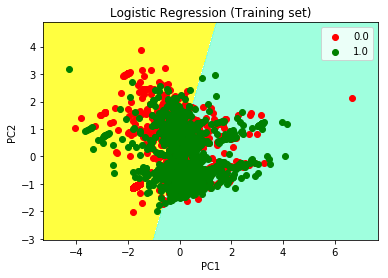

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


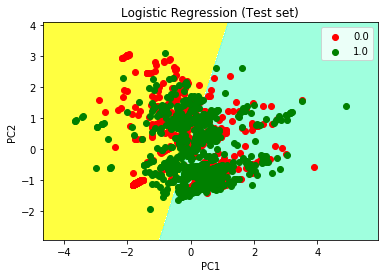

In [0]:
#Vsualization 

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 

from matplotlib.colors import ListedColormap 
 
'''sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

'''

  
classifier = LogisticRegression(C=2.1, solver = 'lbfgs', random_state = 0) 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 


  
cm = confusion_matrix(y_test, y_pred)


print("Before applying PCA , default logistic\n")


X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 

# Visualising the Test set results through scatter plot 

  
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))  
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
# title for scatter plot 
plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 
  
# show scatter plot 
plt.show() 

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 

  
 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

pca = PCA(n_components = 1, svd_solver='arpack') 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_


  
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 


  
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



 after applying pca


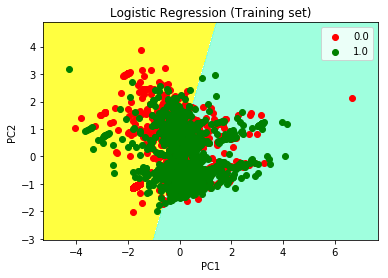

In [0]:


# Predicting the training set 
# result through scatter plot  
from matplotlib.colors import ListedColormap 
  
  
  
print("\n after applying pca")

X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 










In [0]:
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))  
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
# title for scatter plot 
plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 
  
# show scatter plot 
plt.show() 

NameError: ignored

In [0]:
# Visualising the Training set results
'''from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()'''


ValueError: ignored

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from sklearn import svm
from sklearn import datasets

iris=datasets.load_iris()

scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,cv=5)
sorted(scores.keys())
#['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

print(scores['test_recall_macro'])

scores['test_recall_macro']


print(scores['test_precision_macro'])
scores['test_precision_macro']


print(scores['score_time'])
scores['score_time']


print(scores.keys())



#print(iris)

[0.96666667 1.         0.96666667 0.96666667 1.        ]
[0.96969697 1.         0.96969697 0.96969697 1.        ]
[0.00862432 0.00144005 0.00157189 0.00169373 0.00168037]
dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro'])


In [0]:
rom matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')
x=['la','svm','rf']
y=[pla,psa,pra]
y1=[la,sa,ra]
plt.plot(x,y,'g',label='with pca',linewidth=5)
plt.plot(x,y1,'c',label='without pca',linewidth=5)

plt.title('accuracy plot')
plt.xlabel('model name')
plt.ylabel('accuracy percentage')

plt.legend()

plt.grid(True,color='k')

plt.show